[Reference](https://towardsdatascience.com/fast-accurate-anomaly-detection-based-on-copulas-copod-3133ce9041fa)

In [2]:
pip install pyod

     |████████████████████████████████| 112kB 6.7MB/s 
  Created wheel for pyod: filename=pyod-0.8.8-cp37-none-any.whl size=116969 sha256=a4c6e22445f29fbc7acec3603a3a9513ea757c995c392f13f7d4cdb3e8939766
  Stored in directory: /root/.cache/pip/wheels/54/dd/36/a12fa930455b7c38902f2dbf737175421ad30436e47ac5b24d
Successfully built pyod


In [3]:
from pyod.utils.data import generate_data
import numpy as np
X_train, y_train, X_test, y_test = \
        generate_data(n_train=200,
                      n_test=100,
                      n_features=5,
                      contamination=0.1,
                      random_state=3) 
X_train = X_train * np.random.uniform(0, 1, size=X_train.shape)
X_test = X_test * np.random.uniform(0,1, size=X_test.shape)

/usr/local/lib/python3.7/dist-packages/pyod/utils/data.py:189: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


In [4]:
from pyod.models.copod import COPOD
clf_name = 'COPOD'
clf = COPOD()
clf.fit(X_train)
test_scores = clf.decision_function(X_test)

from pyod.utils.utility import precision_n_scores
from sklearn.metrics import roc_auc_score
roc = round(roc_auc_score(y_test, test_scores), ndigits=4)
prn = round(precision_n_scores(y_test, test_scores), ndigits=4)
print(f'{clf_name} ROC:{roc}, precision @ rank n:{prn}')

COPOD ROC:0.9944, precision @ rank n:0.9


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Outlier score')

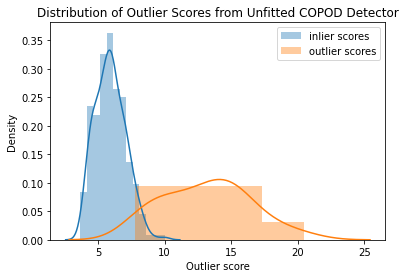

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

X = np.concatenate([X_train, X_test], axis=0)
ys = np.concatenate([y_train, y_test])

detector = COPOD()
scores = detector.decision_function(X)

sns.distplot(scores[ys==0], label="inlier scores")
sns.distplot(scores[ys==1], label="outlier scores").set_title("Distribution of Outlier Scores from Unfitted COPOD Detector")
plt.legend()
plt.xlabel("Outlier score")

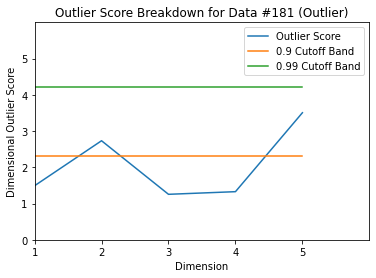

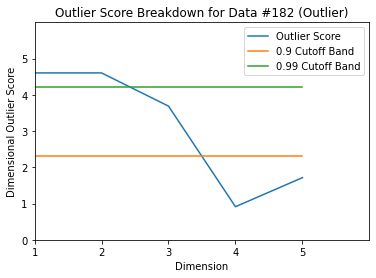

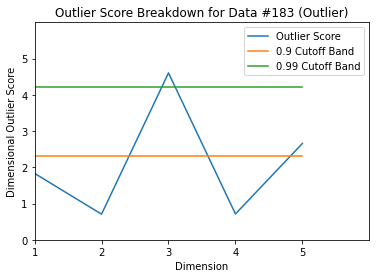

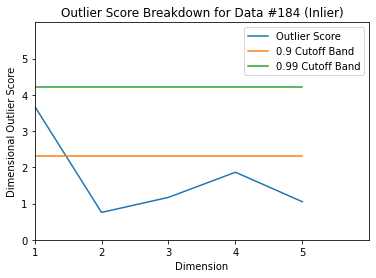

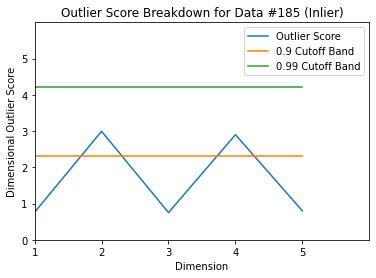

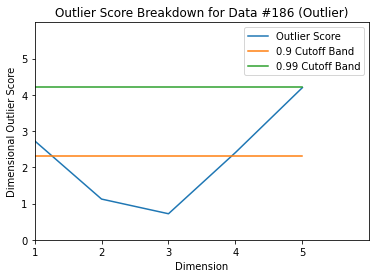

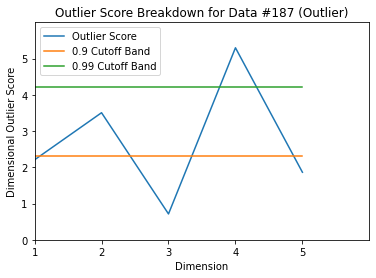

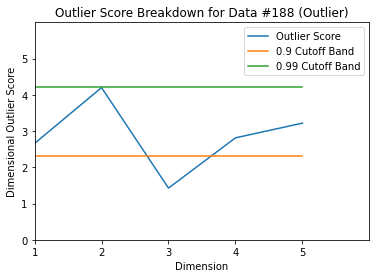

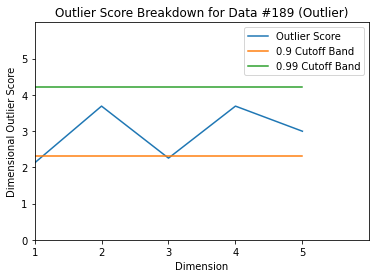

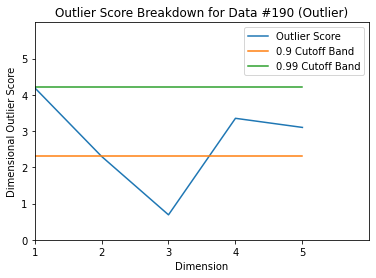

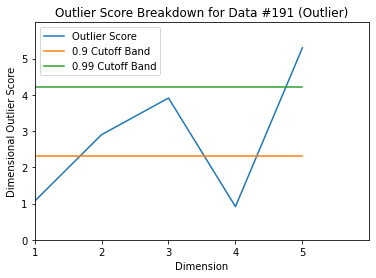

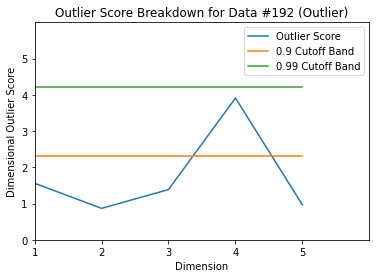

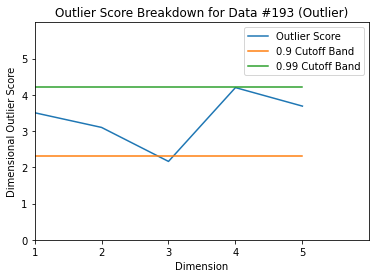

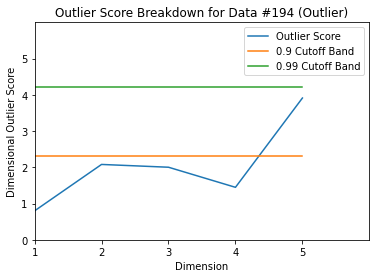

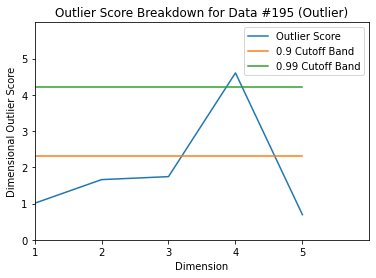

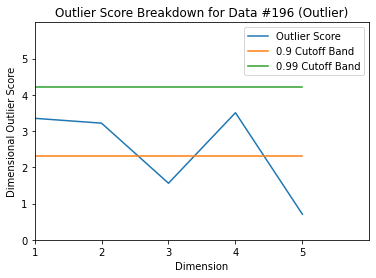

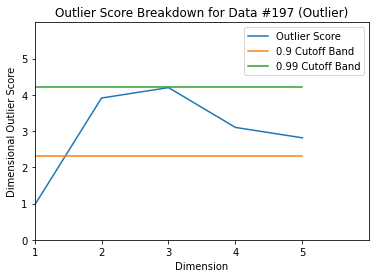

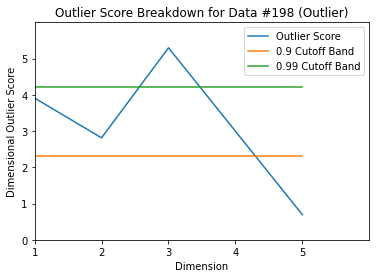

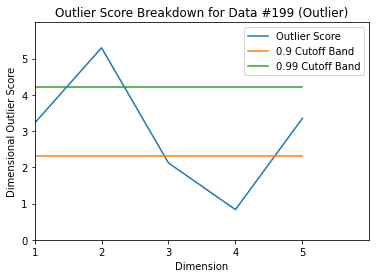

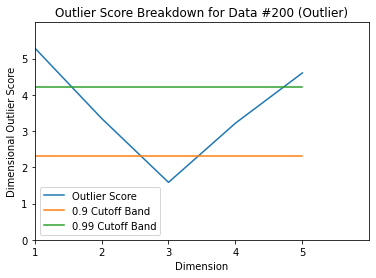

In [7]:
import numpy as np
clf = COPOD()
clf.fit(X_train)

train_outliers_idx = np.where(y_train==1)[0]
for idx in train_outliers_idx:
  clf.explain_outlier(idx, cutoffs=None, feature_names=None)